In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('spam.csv',encoding='latin')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [5]:
dataset.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [6]:
dataset.shape

(5572, 2)

In [7]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\theeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk import word_tokenize,sent_tokenize
dataset['no_of_character']=dataset['text'].apply(len)
dataset['no_of_sentence']=dataset.apply(lambda row:sent_tokenize(row['text']),axis=1).apply(len)
dataset['no_of_words']=dataset.apply(lambda row:word_tokenize(row['text']),axis=1).apply(len)

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_character,5572.0,80.680007,59.992919,2.0,36.0,62.0,123.0,910.0
no_of_sentence,5572.0,2.003589,1.536835,1.0,1.0,2.0,2.0,38.0
no_of_words,5572.0,18.840811,13.837414,1.0,9.0,15.0,27.0,220.0


Text(0, 0.5, 'Number of Data points')

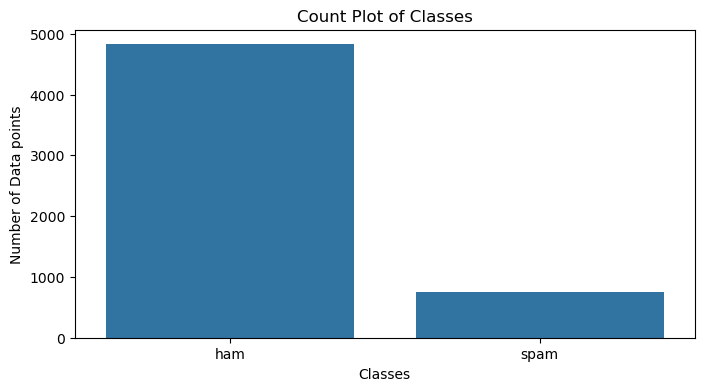

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
fg = sns.countplot(x= dataset["target"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

<Figure size 800x400 with 0 Axes>

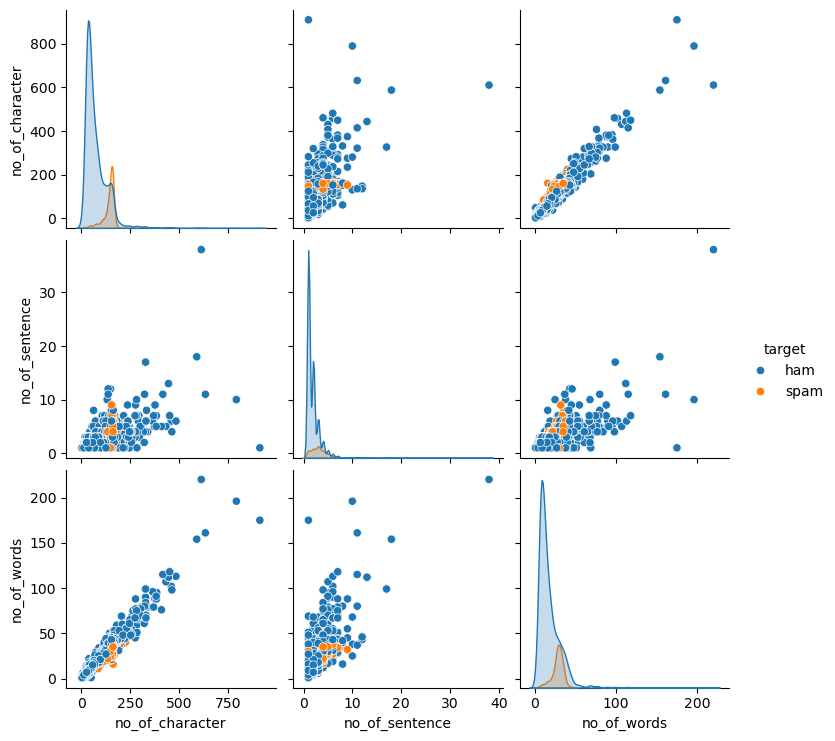

In [10]:
## check for collinearity between independent features
plt.figure(figsize=(8,4))
sns.pairplot(data=dataset,hue='target')
plt.show()

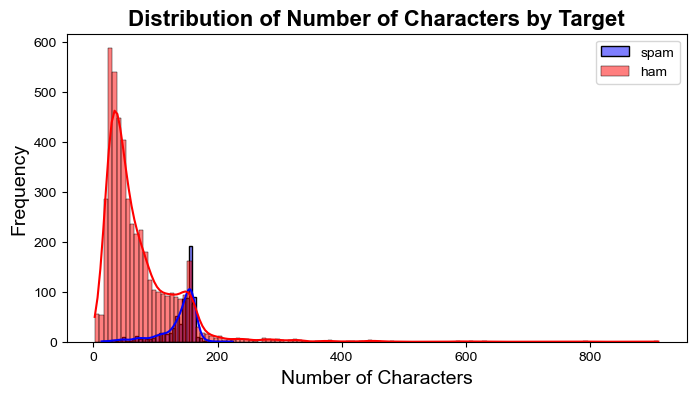

In [11]:
plt.figure(figsize=(8, 4))


sns.histplot(dataset[dataset['target'] == "spam"]['no_of_character'], color='blue', label='spam', kde=True)

sns.histplot(dataset[dataset['target'] == "ham"]['no_of_character'], color='red', label='ham', kde=True)


plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')


plt.legend()


sns.set(style='whitegrid') 

plt.show()


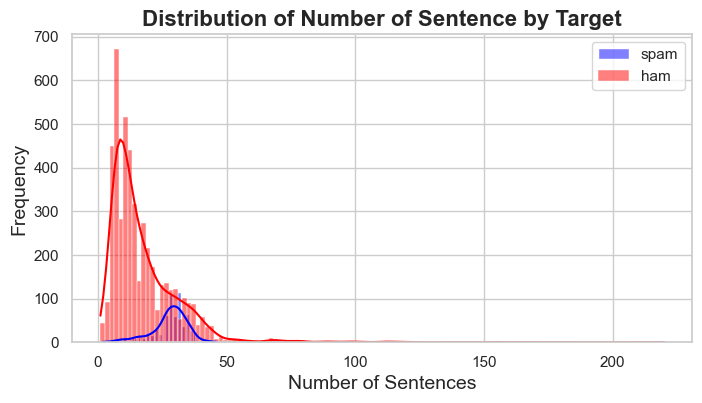

In [12]:
plt.figure(figsize=(8, 4))


sns.histplot(dataset[dataset['target'] == "spam"]['no_of_words'], color='blue', label='spam', kde=True)

sns.histplot(dataset[dataset['target'] == "ham"]['no_of_words'], color='red', label='ham', kde=True)


plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Sentence by Target', fontsize=16, fontweight='bold')


plt.legend()


sns.set(style='whitegrid') 

plt.show()

In [13]:
# implementing removal of outlier using IQR method

In [14]:
#25th Quantile and 75th Quantile
Q1 = dataset['no_of_character'].quantile(0.25)
Q2 = dataset['no_of_character'].quantile(0.75) 

In [15]:
# Calculate IQR
IQR = Q2 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR


In [16]:
dataset = dataset[(dataset['no_of_character'] >= lower_bound) & (dataset['no_of_character'] <= upper_bound)]

In [17]:
dataset.shape

(5505, 5)

In [18]:
## Data preprocessing

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation


snowball_stemmer = SnowballStemmer(language='english')

def transform_text(text):
    tokens = word_tokenize(text.lower())

    processed_tokens=[
        snowball_stemmer.stem(token) for token in tokens
        if token.isalnum() and token not in stopwords.words('english') and token not in punctuation
    ]

    return " ".join(processed_tokens)

    

In [19]:
## sample input trial and error 

for i in dataset['text']:
    sam_text = i
    break
print(i)
transform_text(i)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [20]:
from nltk.stem.arlstem import ARLSTem
stemmer = ARLSTem()
stemmer.stem('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
from nltk.stem import WordNetLemmatizer as wnl
print(wnl().lemmatize('Go until jurong point, crazy.. Available going only in bugis n great world la e buffet... Cine there got amore wat...'))


Go until jurong point, crazy.. Available going only in bugis n great world la e buffet... Cine there got amore wat...


In [22]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
st.stem('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [23]:
dataset['processed_text'] = dataset['text'].apply(transform_text)
dataset.head()

,target,text,no_of_character,no_of_sentence,no_of_words,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


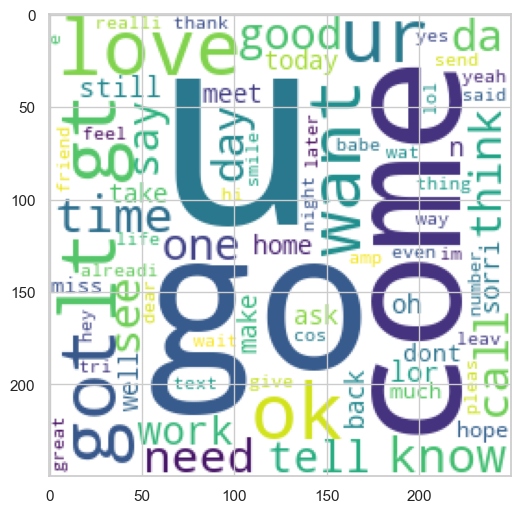

In [24]:
from wordcloud import WordCloud

wc = WordCloud(width = 250, height = 250, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(dataset[dataset['target'] =="ham"]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

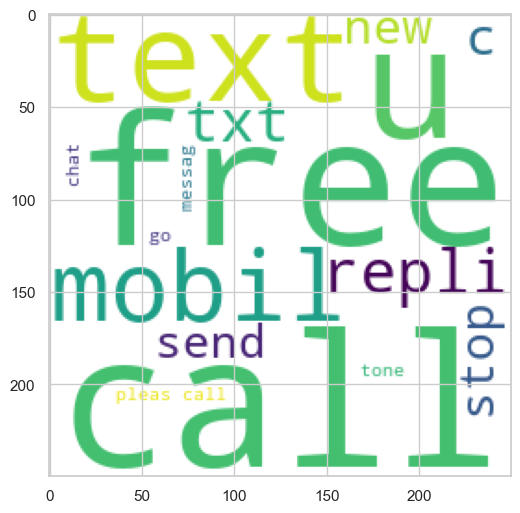

In [25]:
from wordcloud import WordCloud

wc = WordCloud(width = 250, height = 250, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(dataset[dataset['target'] =="spam"]['processed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

In [26]:
#detailed view on Spam and Ham words

#find top 10 words of spam

#extracting spam corpus

spam_corpus=[]
for sentence in dataset[dataset['target']=="spam"]['processed_text'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

In [27]:
from collections import Counter

spam_filtered = pd.DataFrame(Counter(spam_corpus).most_common(10))
spam_filtered.head()

,0,1
0,call,365
1,free,219
2,2,174
3,txt,156
4,ur,144


C:\Users\theeraj\AppData\Local\Temp\ipykernel_3808\1169363717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_filtered,x=spam_filtered[0],y=spam_filtered[1],palette='bright')


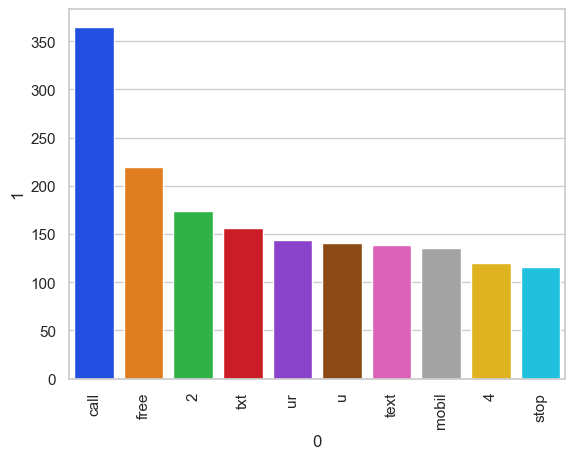

In [28]:
sns.barplot(data=spam_filtered,x=spam_filtered[0],y=spam_filtered[1],palette='bright')
plt.xticks(rotation=90)
plt.show()

C:\Users\theeraj\AppData\Local\Temp\ipykernel_3808\3443637026.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=not_spam_filtered,x=not_spam_filtered[0],y=not_spam_filtered[1],palette='bright')


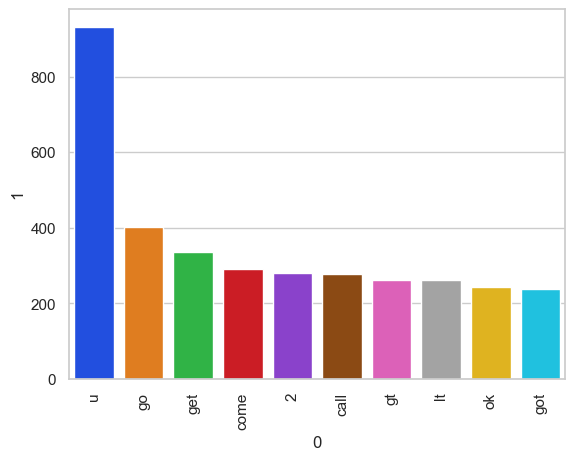

In [29]:
#find top 10 words of not spam words

#extracting not spam corpus

not_spam_corpus=[]
for sentence in dataset[dataset['target']=="ham"]['processed_text'].tolist():
    for word in sentence.split():
        not_spam_corpus.append(word)

not_spam_filtered = pd.DataFrame(Counter(not_spam_corpus).most_common(10))
not_spam_filtered.head()

sns.barplot(data=not_spam_filtered,x=not_spam_filtered[0],y=not_spam_filtered[1],palette='bright')
plt.xticks(rotation=90)
plt.show()

In [30]:
## vectorizing method

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features  = 3000)

In [31]:
X = tfid.fit_transform(dataset['processed_text']).toarray()
import joblib
joblib.dump(tfid, './models/tfidf_vectorizer.pkl')
from sklearn.preprocessing import LabelEncoder

dataset['target'] = LabelEncoder().fit_transform(dataset['target']) 
y = dataset['target'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
svc = SVC(kernel= "rbf", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )

In [35]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'RF': rfc,    
}

In [36]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import joblib

def train_classifier(clfs, X_train, y_train, X_test, y_test,model_path):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    joblib.dump(clfs, model_path)
    return accuracy , precision, f1score

In [37]:
accuracy_scores = []
precision_scores = []
f1score=[]
for name , clfs in clfs.items():
    model_path = f"./models/{name}_model.pkl"

    current_accuracy, current_precision, current_f1score = train_classifier(clfs, X_train, y_train, X_test, y_test,model_path)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("F1-Score: ", current_f1score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1score.append(current_f1score)


For:  SVC
Accuracy:  0.9818346957311535
Precision:  0.9923664122137404
F1-Score:  0.9285714285714286

For:  KNN
Accuracy:  0.9118982742960945
Precision:  0.9642857142857143
F1-Score:  0.526829268292683

For:  NB
Accuracy:  0.9836512261580381
Precision:  1.0
F1-Score:  0.9357142857142857

For:  RF
Accuracy:  0.9763851044504995
Precision:  1.0
F1-Score:  0.9044117647058824


In [40]:
import joblib
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation

# Load the pre-trained models and the fitted TfidfVectorizer
svc_model = joblib.load('./models/SVC_model.pkl')
knn_model = joblib.load('./models/KNN_model.pkl')
nb_model = joblib.load('./models/NB_model.pkl')
rf_model = joblib.load('./models/RF_model.pkl')
tfid = joblib.load('./models/tfidf_vectorizer.pkl')  # Load the fitted TF-IDF vectorizer

# List of models
models = [svc_model, knn_model, nb_model, rf_model]

# Initialize the SnowballStemmer
snowball_stemmer = SnowballStemmer(language='english')

# Function to preprocess the text
def transform_text(text):
    tokens = word_tokenize(text.lower())

    processed_tokens = [
        snowball_stemmer.stem(token) for token in tokens
        if token.isalnum() and token not in stopwords.words('english') and token not in punctuation
    ]

    return " ".join(processed_tokens)

# Preprocess the new text and apply TF-IDF vectorization
def preprocess_input(text):
    # First, transform the text using your custom preprocessing function
    transformed_text = transform_text(text)
    tfid=joblib.load('./models/tfidf_vectorizer.pkl')
    # Then apply the already fitted TF-IDF vectorizer to the processed text
    return tfid.transform([transformed_text]).toarray()

# Predict using majority voting
def predict_ensemble(text):
    preprocessed_text = preprocess_input(text)
    
    # Gather predictions from each model
    predictions = [model.predict(preprocessed_text)[0] for model in models]

    # Apply majority voting
    final_prediction = 1 if np.sum(predictions) >= 3 else 0
    
    return "spam" if final_prediction == 1 else "ham"

# Example usage:
text_message = "Hmm...my uncle just informed me that he's paying the school directly. So pls buy food."
result = predict_ensemble(text_message)

print(f"The message is predicted as: {result}")


The message is predicted as: ham
